# Лабораторная работа 5 | Рылов А.Д М80-407Б-21

## 1. Выбор начальных условий


Для задачи регрессии взят [набор данных](https://www.kaggle.com/datasets/bilalabdulmalik/top-300-asian-universities-qs-rankings-2024) – датасет метрик университетов азиатских стран. Целевая метрика – столбец `Overall Score`. Соответственно, выбраны следующие метрики качества:

1. **Mean Absolute Error (MAE)** – среднее отклонение прогноза модели от истинного значения.
  
2. **Mean Squared Error (MSE)** – среднеквадратичная ошибка для выявления крупных отклонений в прогнозах.
   
3. **Root Mean Squared Error (RMSE)** – Корень из среднеквадратичной ошибки для сравнения с MAE.
   
4. **R-squared (R²)** – коэффициент детерминации для сравнения со средним значением

**Практическая ценность**: Выяснить, какие факторы оказывают наибольшее влияние на качество образования в университете.

Для задачи классификации взят [набор данных](https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset) – датасет с характеристиками грибов (размеры шляпки, цвет ножки и тд). Целевой переменной является столбец `class`` (Poisonous or Not, т.е. ядовитый гриб или нет, True если ядовитый). Соответственно, выбраны следующие метрики качества::

1. **Accuracy** – Точность для оценки общей точности модели
2. **Precision** – Точность для положительного класса чтобы минимизировать ложные срабатывания
3. **Recall** – Полнота, для минимизации ложных отрицаний

4. **F1-score** – Среднее гармоническое Precision и Recall

**Практическая ценность**: модель, обученную на этом наборе данных могут использовать дроны-сборщики съедобных грибов (или, наоборот, ядовитых).

## 2.1	Создание бейзлайна (регрессия)

In [20]:
import numpy as np
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor


file_path = '/content/topuniversities.csv'
data = pd.read_csv(file_path)
data.head()

,Rank,Ordinal Rank,University Name,Overall Score,City,Country,Citations per Paper,Papers per Faculty,Academic Reputation,Faculty Student Ratio,Staff with PhD,International Research Center,International Students,Outbound Exchange,Inbound Exchange,International Faculty,Employer Reputation
0,1,1,Peking University,100.0,Beijing,China,96.4,79.8,100.0,98.6,90.7,98.0,69.1,100.0,88.5,83.2,100.0
1,2,2,The University of Hong Kong,99.7,Pokfulam,Hong Kong,99.5,55.0,100.0,93.3,97.4,98.4,100.0,100.0,99.8,100.0,96.8
2,3,3,National University of Singapore (NUS),98.9,Singapore,Singapore,99.9,57.4,100.0,85.8,82.5,99.9,99.2,97.6,93.4,100.0,99.9
3,4,4,Nanyang Technological University,98.3,Singapore,Singapore,100.0,53.8,100.0,93.0,67.0,99.7,98.8,97.9,90.5,100.0,98.8
4,5,5,Fudan University,97.2,Shanghai,China,92.1,63.1,99.8,92.5,73.4,92.1,81.0,94.9,99.5,98.9,99.5


In [6]:
X = data.drop(columns=['Overall Score', 'University Name', 'City', 'Country'])
y = data['Overall Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

model = GradientBoostingRegressor(random_state=42)
model.fit(X_train_imputed, y_train)

y_pred = model.predict(X_test_imputed)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 0.2048845333559789
Mean Squared Error (MSE): 0.10202731196541102
Root Mean Squared Error (RMSE): 0.31941714413195016
R-squared (R²): 0.9997203644218087


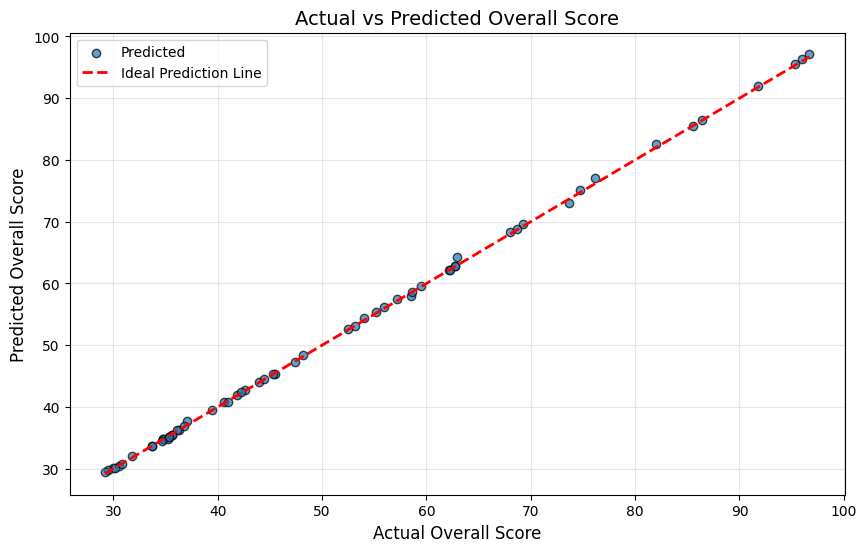

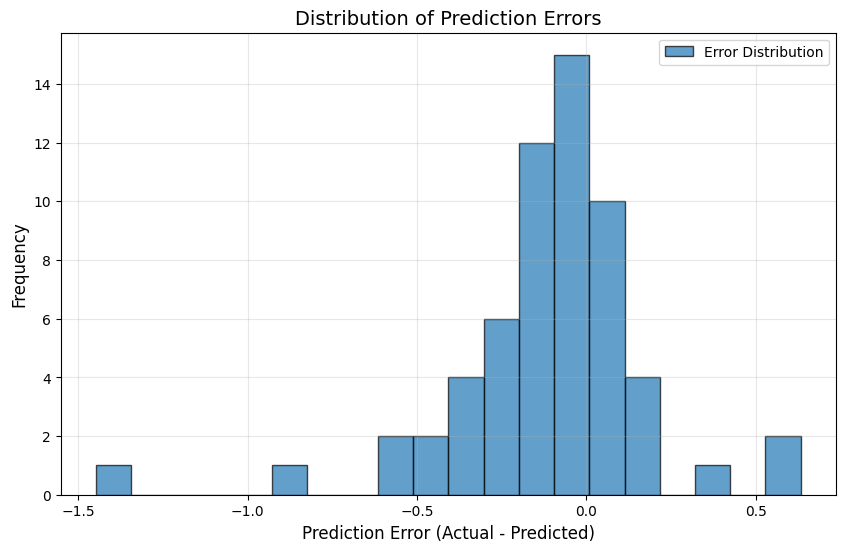

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Prediction Line')
plt.xlabel('Actual Overall Score', fontsize=12)
plt.ylabel('Predicted Overall Score', fontsize=12)
plt.title('Actual vs Predicted Overall Score', fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()

errors = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=20, edgecolor='k', alpha=0.7, label='Error Distribution')
plt.xlabel('Prediction Error (Actual - Predicted)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Prediction Errors', fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()


У модели очень высокие метрики в базовом варианте, дальнейшее улучшение не требуется

## 4.1	Имплементация алгоритма машинного обучения (регрессия)

In [21]:
class DecisionTreeRegressorCustom:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y, depth=0)

    def _build_tree(self, X, y, depth):
        if len(y) < self.min_samples_split or (self.max_depth is not None and depth >= self.max_depth):
            return np.mean(y)

        best_feature, best_threshold = self._find_best_split(X, y)
        if best_feature is None:
            return np.mean(y)

        left_indices = X[:, best_feature] <= best_threshold
        right_indices = ~left_indices

        return {
            'feature': best_feature,
            'threshold': best_threshold,
            'left': self._build_tree(X[left_indices], y[left_indices], depth + 1),
            'right': self._build_tree(X[right_indices], y[right_indices], depth + 1),
        }

    def _find_best_split(self, X, y):
        best_feature = None
        best_threshold = None
        best_mse = float('inf')

        for feature in range(X.shape[1]):
            sorted_indices = X[:, feature].argsort()
            X_sorted, y_sorted = X[sorted_indices, feature], y[sorted_indices]
            for i in range(1, len(y_sorted)):
                if X_sorted[i] == X_sorted[i - 1]:
                    continue
                left_mean = np.mean(y_sorted[:i])
                right_mean = np.mean(y_sorted[i:])
                mse = (
                    np.sum((y_sorted[:i] - left_mean) ** 2) +
                    np.sum((y_sorted[i:] - right_mean) ** 2)
                ) / len(y)

                if mse < best_mse:
                    best_mse = mse
                    best_feature = feature
                    best_threshold = X_sorted[i]

        return best_feature, best_threshold

    def predict_one(self, x, tree):
        while isinstance(tree, dict):
            if x[tree['feature']] <= tree['threshold']:
                tree = tree['left']
            else:
                tree = tree['right']
        return tree

    def predict(self, X):
        return np.array([self.predict_one(x, self.tree) for x in X])

class CustomGradientBoosting:
    def __init__(self, n_estimators=50, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []
        self.initial_prediction = None

    def fit(self, X, y):
        self.initial_prediction = y.mean()
        predictions = np.full(y.shape, self.initial_prediction)

        for i in range(self.n_estimators):
            residuals = y - predictions
            tree = DecisionTreeRegressorCustom(max_depth=self.max_depth)
            tree.fit(X, residuals)
            update = tree.predict(X)
            predictions += self.learning_rate * update
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.full(X.shape[0], self.initial_prediction)
        for tree in self.trees:
            predictions += self.learning_rate * tree.predict(X)
        return predictions


X = data.drop(columns=['Overall Score', 'University Name', 'City', 'Country'])
y = data['Overall Score']

imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = CustomGradientBoosting(n_estimators=50, learning_rate=0.1, max_depth=3)
model.fit(X_train.values, y_train.values)

y_pred = model.predict(X_test.values)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


MAE: 0.3617660895009877
MSE: 0.26159980907485286
RMSE: 0.5114682874576417
R²: 0.9992830094956321


У модели очень высокие метрики в базовом варианте, дальнейшее улучшение не требуется

## Сравнение результатов

|Метрика|Custom|Sklearn|
|-|-|-|
|MAE|0.36|0.20|
|MSE|0.26|0.10|
|RMSE|0.51|0.32|
|R-squared|0.9992|0.9997|


#### Результаты примерно соотвествуют тому, что получилось с использованием sklearn. Возмножно, в библиотечной: реализации есть какие-либо дополнительные оптимизации или подобраны более удачные гиперпараметры

## 2.2	Создание бейзлайна (классификация)

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


file_path = '/content/mushroom_cleaned.csv'
data = pd.read_csv(file_path)
data.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [23]:
X = data.drop('class', axis=1)
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.8794299990746738
Precision: 0.892542372881356
Recall: 0.8872788542544229
F1-score: 0.8899028305872412


## 3.2	Улучшение бейзлайна (классификация)


### Как можно улучшить
+ Подбор гиперпараметров
+ Масштабирование данных – с помощью StandardScaler.
+ Раннее завершение обучения – параметр n_iter_no_change=10.
+ Устойчивое разделение данных – с использованием stratify=y.
+ Визуализация важности признаков – для лучшего понимания вклада каждого признака.r

Accuracy: 0.9550291477745906
Precision: 0.9642187766229341
Recall: 0.9534962089300758
F1-score: 0.9588275160962385


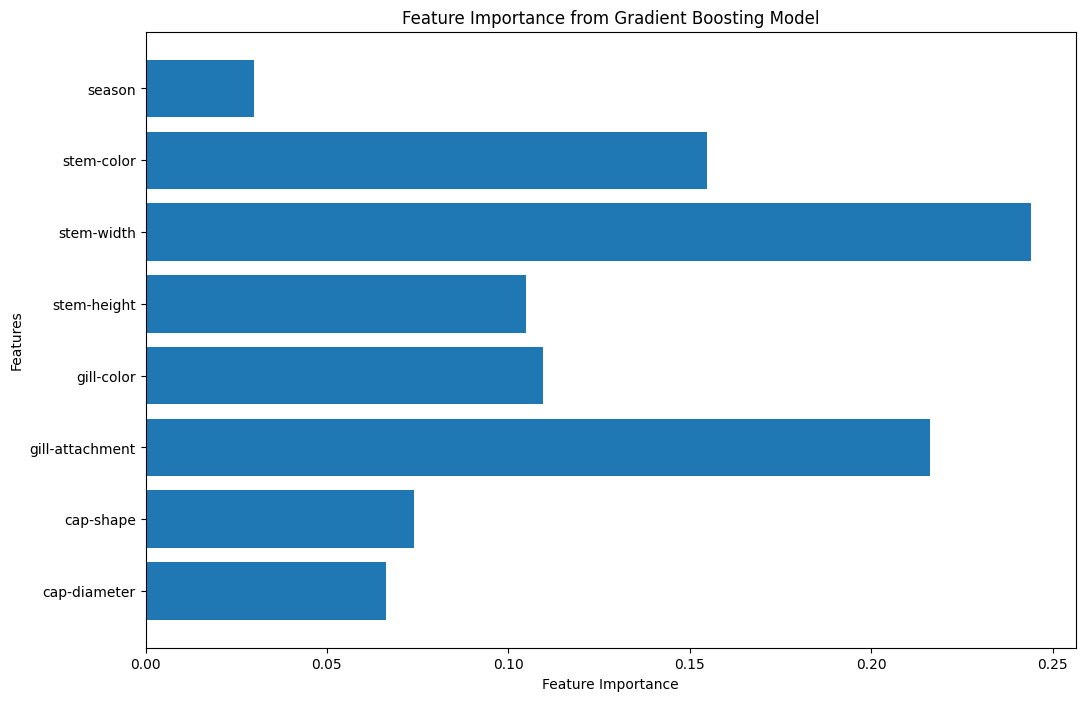

In [36]:
X = data.drop('class', axis=1)
y = data['class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

model = GradientBoostingClassifier(
    random_state=42,
    n_estimators=200,
    learning_rate=0.1,
    max_depth=4,
    min_samples_split=2,
    min_samples_leaf=1,
    n_iter_no_change=10,  # Раннее завершение, если нет улучшений за 10 итераций
    validation_fraction=0.2
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

feature_importances = model.feature_importances_
feature_names = data.drop('class', axis=1).columns

plt.figure(figsize=(12, 8))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Gradient Boosting Model')
plt.show()


## Сравнение результатов

|Метрика|Base|Improved|
|-|-|-|
|Accuracy|0.87|0.95|
|Precision|0.89|0.96|
|Recall|0.88|0.95|
|F1-score|0.88|0.95|



## 4.2	Имплементация алгоритма машинного обучения (классификация)

---



In [30]:
class DecisionTreeRegressorCustom:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y, depth=0)

    def _build_tree(self, X, y, depth):
        if len(y) < self.min_samples_split or (self.max_depth is not None and depth >= self.max_depth):
            return np.mean(y)

        best_feature, best_threshold = self._find_best_split(X, y)
        if best_feature is None:
            return np.mean(y)

        left_indices = X[:, best_feature] <= best_threshold
        right_indices = ~left_indices

        return {
            'feature': best_feature,
            'threshold': best_threshold,
            'left': self._build_tree(X[left_indices], y[left_indices], depth + 1),
            'right': self._build_tree(X[right_indices], y[right_indices], depth + 1),
        }

    def _find_best_split(self, X, y):
        best_feature = None
        best_threshold = None
        best_mse = float('inf')

        for feature in range(X.shape[1]):
            sorted_indices = X[:, feature].argsort()
            X_sorted, y_sorted = X[sorted_indices, feature], y[sorted_indices]
            for i in range(1, len(y_sorted)):
                if X_sorted[i] == X_sorted[i - 1]:
                    continue
                left_mean = np.mean(y_sorted[:i])
                right_mean = np.mean(y_sorted[i:])
                mse = (
                    np.sum((y_sorted[:i] - left_mean) ** 2) +
                    np.sum((y_sorted[i:] - right_mean) ** 2)
                ) / len(y)

                if mse < best_mse:
                    best_mse = mse
                    best_feature = feature
                    best_threshold = X_sorted[i]

        return best_feature, best_threshold

    def predict_one(self, x, tree):
        while isinstance(tree, dict):
            if x[tree['feature']] <= tree['threshold']:
                tree = tree['left']
            else:
                tree = tree['right']
        return tree

    def predict(self, X):
        return np.array([self.predict_one(x, self.tree) for x in X])

class CustomGradientBoosting:
    def __init__(self, n_estimators=50, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []
        self.initial_prediction = None

    def fit(self, X, y):
        self.initial_prediction = y.mean()
        predictions = np.full(y.shape, self.initial_prediction)

        for i in range(self.n_estimators):
            residuals = y - predictions
            tree = DecisionTreeRegressorCustom(max_depth=self.max_depth)
            tree.fit(X, residuals)
            update = tree.predict(X)
            predictions += self.learning_rate * update
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.full(X.shape[0], self.initial_prediction)
        for tree in self.trees:
            predictions += self.learning_rate * tree.predict(X)
        return predictions


X = data.drop('class', axis=1).values
y = data['class'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

model = CustomGradientBoosting(n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Accuracy: 0.6882576108078098
Precision: 0.7205983493810179
Recall: 0.7061499578770009
F1-score: 0.7133009956599439


|Метрика|Base Sklearn|Base Custom|
|-|-|-|
|Accuracy|0.87|0.68|
|Precision|0.89|0.72|
|Recall|0.88|0.70|
|F1-score|0.88|0.71|


### Кастомная реализация с улучшенным бейзлайном

### Как можно улучшить
+ Использование медианы вместо среднего для устойчивости к несбалансированным данным.

In [35]:
class GradientBoostingClassifier:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []
        self.initial_pred = None

    def fit(self, X, y):
        self.initial_pred = np.mean(y)
        residuals = y - self.initial_pred

        for _ in range(self.n_estimators):
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)
            predictions = tree.predict(X)

            residuals -= self.learning_rate * predictions
            self.models.append(tree)

    def predict(self, X):
        y_pred = np.full(X.shape[0], self.initial_pred)

        for tree in self.models:
            y_pred += self.learning_rate * tree.predict(X)

        return (y_pred > 0.5).astype(int)

X = data.drop('class', axis=1).values
y = data['class'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.8801702600166559
Precision: 0.9
Recall: 0.8795282224094355
F1-score: 0.8896463570515551


|Метрика|Base Cutstom|Custom Improved|Sklearn Improved|
|-|-|-|-|
|Accuracy|0.68|0.88|0.95|
|Precision|0.72|0.90|0.96|
|Recall|0.70|0.87|0.95|
|F1-score|0.71|0.88|0.95|


#### Метрики Sklearn Improved значительно превзошли самописную реализацию